## **3. Data Preprocessing**

### **3.1 Overview**
This notebook demonstrates the data preprocessing pipeline for customer segmentation. The code has been modularized into the `src/data_preprocessing.py` module for production use.

**Key Steps:**
1. Load raw transaction data
2. Handle missing values (Description, CustomerID)
3. Remove duplicate records
4. Enforce proper data types
5. Remove outliers using IQR method
6. Filter out cancelled orders

**Production Usage:**
```python
from src.data_preprocessing import preprocess_data
df_clean = preprocess_data('../data/raw/Online_Retail.csv')
```

### **3.2 Checking Missing and Duplicates**

In [1]:
# Import libraries and load data
import pandas as pd
import sys
import os

# Add src directory to path for importing our module
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

# Load raw data
df = pd.read_csv('../data/raw/Online_Retail.csv')
print(f"Raw data shape: {df.shape}")
df.head()

Raw data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [2]:
# Check missing values using our modular function
from data_preprocessing import check_missing_values

missing_summary = check_missing_values(df)
print("Missing Values Summary:")
print(missing_summary)

# Note: This functionality is now available in src/data_preprocessing.py
# Function: check_missing_values(df)

Missing Values Summary:
             Missing_Count  Missing_Percent
Description           1454             0.27
CustomerID          135080            24.93


In [3]:
# Handle missing values using our modular function
from data_preprocessing import handle_missing_values

df_clean = handle_missing_values(df)
print(f"Shape after handling missing values: {df_clean.shape}")

# Verify no missing values remain
missing_after = check_missing_values(df_clean)
print("Missing values after cleaning:")
print(missing_after)

# Check how CustomerID nulls were handled
null_customer_ids = df['CustomerID'].isnull().sum()
new_customer_ids = df_clean['CustomerID'].str.startswith('N').sum()
print(f"\nOriginal null CustomerIDs: {null_customer_ids}")
print(f"New CustomerIDs created: {new_customer_ids}")

# Note: This functionality is now available in src/data_preprocessing.py
# Function: handle_missing_values(df)

e:\GitHub\Customer Clustering\src\data_preprocessing.py:77: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N4810', 'N9326', 'N9628', 'N3592', 'N5605', 'N7958', 'N4420', 'N7918', 'N8785', 'N7426', 'N8455', 'N6377', 'N4760', 'N1631', 'N8098', 'N3777', 'N3188', 'N9668', 'N4336', 'N2476', 'N1967', 'N9242', 'N9480', 'N8365', 'N7949', 'N3409', 'N4777', 'N6201', 'N7637', 'N9738', 'N5464', 'N2518', 'N9952', 'N6876', 'N2435', 'N4648', 'N3651', 'N8827', 'N8667', 'N1806', 'N9588', 'N2881', 'N3860', 'N4867', 'N4667', 'N2884', 'N2697', 'N4772', 'N8048', 'N9551', 'N4775', 'N6130', 'N3042', 'N3239', 'N5332', 'N6723', 'N3841', 'N7297', 'N8065', 'N5382', 'N9947', 'N1148', 'N9923', 'N8325', 'N8060', 'N7477', 'N8169', 'N1953', 'N1305', 'N9036', 'N7328', 'N7293', 'N5026', 'N4349', 'N2153', 'N6277', 'N2014', 'N6227', 'N9394', 'N6268', 'N6379', 'N2075', 'N3631', 'N2475', 'N9586', 'N4879', 'N9440', 'N2491', 'N2712', 'N6408', 

Generated 133626 new customer IDs (N1001-N9999 format)
Shape after handling missing values: (540455, 8)
Missing values after cleaning:
Empty DataFrame
Columns: [Missing_Count, Missing_Percent]
Index: []

Original null CustomerIDs: 135080
New CustomerIDs created: 133626


In [4]:
# Remove duplicates using our modular function
from data_preprocessing import remove_duplicates

df_no_duplicates = remove_duplicates(df_clean)
print(f"Shape after removing duplicates: {df_no_duplicates.shape}")
print(f"Removed {df_clean.shape[0] - df_no_duplicates.shape[0]} duplicate records")

# Note: This functionality is now available in src/data_preprocessing.py
# Function: remove_duplicates(df, keep='last')

Shape after removing duplicates: (535230, 8)
Removed 5225 duplicate records


### **3.3 Data Type Enforcement**

In [5]:
# Enforce proper data types using our modular function
from data_preprocessing import enforce_dtypes

df_typed = enforce_dtypes(df_no_duplicates)
print("Data types after enforcement:")
print(df_typed.dtypes)
print(f"\nShape: {df_typed.shape}")

# Note: This functionality is now available in src/data_preprocessing.py
# Function: enforce_dtypes(df)

Data types after enforcement:
InvoiceNo              object
StockCode              object
Description            object
Quantity                Int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

Shape: (535230, 8)


### **3.4 Outlier Detection and Removal**

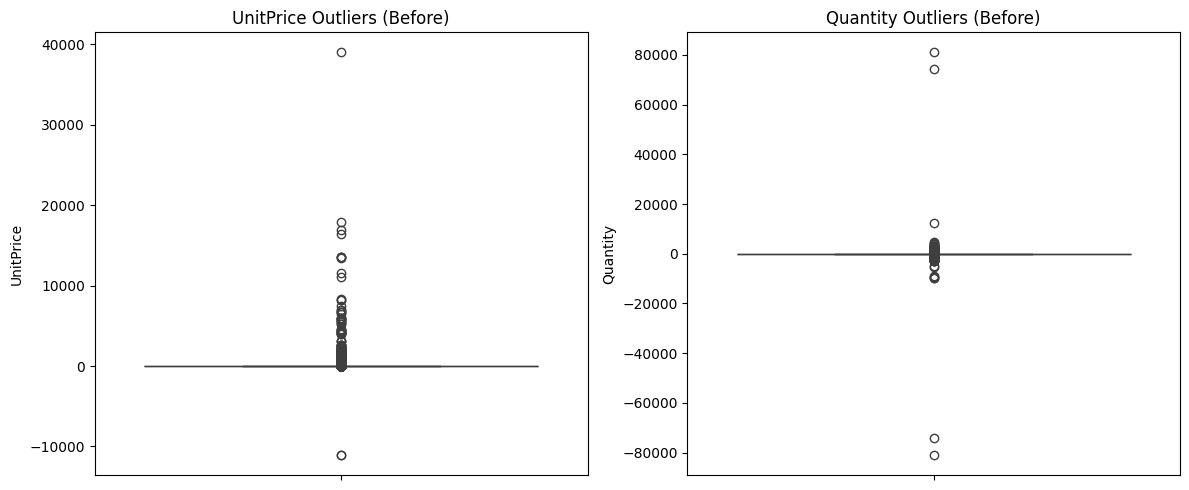

In [6]:
# Visualize outliers before removal
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_typed['UnitPrice'])
plt.title('UnitPrice Outliers (Before)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_typed['Quantity'])
plt.title('Quantity Outliers (Before)')

plt.tight_layout()
plt.show()

In [7]:
# Remove outliers using IQR method
from data_preprocessing import remove_outliers_iqr

df_no_outliers = remove_outliers_iqr(df_typed, ['UnitPrice', 'Quantity'])
print(f"Original shape: {df_typed.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")
print(f"Removed {df_typed.shape[0] - df_no_outliers.shape[0]} outlier records")

# Note: This functionality is now available in src/data_preprocessing.py
# Function: remove_outliers_iqr(df, columns)

Original shape: (535230, 8)
Shape after removing outliers: (467741, 8)
Removed 67489 outlier records


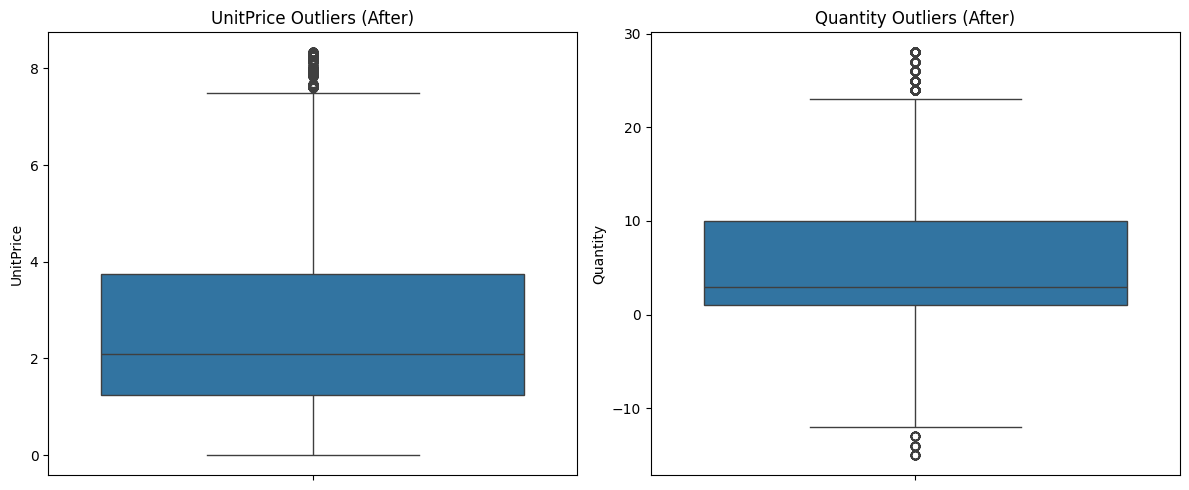

In [8]:
# Visualize outliers after removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['UnitPrice'])
plt.title('UnitPrice Outliers (After)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['Quantity'])
plt.title('Quantity Outliers (After)')

plt.tight_layout()
plt.show()

### **3.5 Filter Viable Orders**

In [9]:
# Remove cancelled orders (negative quantities)
from data_preprocessing import filter_viable_orders

viable_orders = filter_viable_orders(df_no_outliers)
print(f"Shape after filtering viable orders: {viable_orders.shape}")
print(f"Removed {df_no_outliers.shape[0] - viable_orders.shape[0]} cancelled orders")

# Display sample of viable orders
viable_orders.head()

# Note: This functionality is now available in src/data_preprocessing.py
# Function: filter_viable_orders(df)

Shape after filtering viable orders: (461035, 8)
Removed 6706 cancelled orders


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom


### **3.6 Complete Pipeline**

##### Run the complete preprocessing pipeline using our modular function 

In [11]:
from data_preprocessing import preprocess_data

df_final = preprocess_data('../data/raw/Online_Retail.csv')
print(f"Final processed data shape: {df_final.shape}")
print("\nFinal data info:")
df_final.info()

e:\GitHub\Customer Clustering\src\data_preprocessing.py:77: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N5450', 'N5868', 'N1367', 'N8400', 'N1329', 'N3252', 'N3301', 'N9106', 'N2801', 'N9608', 'N5310', 'N6846', 'N7699', 'N2403', 'N7996', 'N3525', 'N8041', 'N8931', 'N9040', 'N3001', 'N6079', 'N7288', 'N2838', 'N9254', 'N4322', 'N3580', 'N1065', 'N3270', 'N3437', 'N4045', 'N4370', 'N2246', 'N3233', 'N7975', 'N1293', 'N6334', 'N9542', 'N2641', 'N8131', 'N2610', 'N4432', 'N7282', 'N4668', 'N4700', 'N1482', 'N9852', 'N6723', 'N9588', 'N2441', 'N2034', 'N5336', 'N1389', 'N6683', 'N7467', 'N3451', 'N1267', 'N6169', 'N8161', 'N2543', 'N5695', 'N7869', 'N2115', 'N8632', 'N5564', 'N2277', 'N4201', 'N4290', 'N9019', 'N1846', 'N4860', 'N9503', 'N2887', 'N9876', 'N8080', 'N1302', 'N9890', 'N8503', 'N8496', 'N2374', 'N8805', 'N2293', 'N2483', 'N6095', 'N3042', 'N2082', 'N7890', 'N2376', 'N3519', 'N9650', 'N8110', 

Generated 133626 new customer IDs (N1001-N9999 format)
Final processed data shape: (461035, 8)

Final data info:
<class 'pandas.core.frame.DataFrame'>
Index: 461035 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    461035 non-null  object        
 1   StockCode    461035 non-null  object        
 2   Description  461035 non-null  object        
 3   Quantity     461035 non-null  Int64         
 4   InvoiceDate  461035 non-null  datetime64[ns]
 5   UnitPrice    461035 non-null  float64       
 6   CustomerID   461035 non-null  object        
 7   Country      461035 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), object(5)
memory usage: 32.1+ MB


##### This single function performs all the steps above:
##### 1. Load data
##### 2. Handle missing values
##### 3. Remove duplicates
##### 4. Enforce data types
##### 5. Remove outliers
##### 6. Filter viable orders

In [ ]:
# Save processed data
# from data_preprocessing import save_processed_data

# save_processed_data(df_final, '../data/processed/Online_Retail_Cleaned.csv')
# print("\nProcessed data saved to: ../data/processed/Online_Retail_Cleaned.csv")